In [56]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras import datasets, layers, models
import numpy as np
import pathlib


In [57]:
data_dir = pathlib.Path("DATA")
image_count = len(list(data_dir.glob('*/*.jpg')))
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]) 
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     color_mode='grayscale',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
image_batch, label_batch = next(train_data_gen)

Found 72 images belonging to 3 classes.


In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64,input_dim=13))
model.add(layers.Dense(64, input_dim=13))
model.add(layers.Dense(13, activation='softmax'))

In [59]:
model.load_weights('weights/checkpoint.h5')

In [60]:
model.summary()
model.pop()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [61]:
pred = model.predict(image_batch)

In [62]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(pred)

In [63]:
X.shape

(32, 2)

In [64]:
#from sklearn.neighbors import KDTree


In [73]:
quer = X[1]

In [74]:
from scipy import spatial
X[spatial.KDTree(X).query(quer,k=6)[1]]

array([[14.323816 , 22.858541 ],
       [ 6.8235736,  3.5176733],
       [26.538061 ,  5.2375317],
       [-7.348347 , 22.391132 ],
       [30.754848 , 37.437813 ],
       [ 1.691655 , 42.433483 ]], dtype=float32)

In [75]:
distance,index = spatial.KDTree(X).query(quer,k=6)
index

array([ 1,  0,  4, 27, 24, 26])

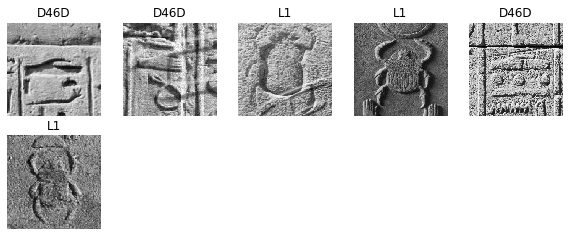

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for n in range(len(index)):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(np.squeeze(image_batch[index[n]]),cmap = "gray")
      plt.title(CLASS_NAMES[label_batch[index[n]]==1][0].title())
      plt.axis('off')